# LIVE_COIN_WATCH
    
API: https://www.livecoinwatch.com/tools/api

The below script will build a model using specifically Python's Requests and Asyncio libraries to hit an API and extract specific data at set timeframes.

Essentially we want to extract data from an API at certain times and build analytical insights from this data using analytical tooling.

### API Workflow

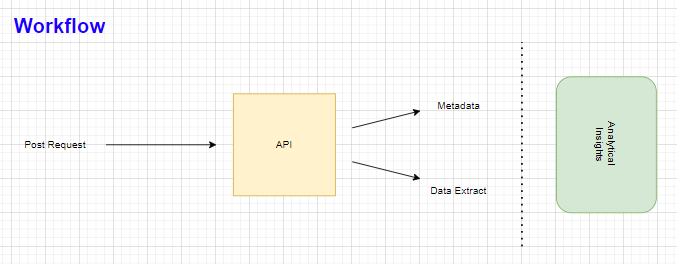

In [1]:
import numpy as np # numerical python (heavy computational power)
import pandas as pd # analytical library

import asyncio # scedueling asynchronous tasks
import requests # working with APIs

import json # json object
import datetime # datetime library

In [2]:
def coin_subsetter(coin):
    global analysis
    crypto_coin = [coin]
    analysis = dataset[dataset.Coin.isin(crypto_coin)]
    print(analysis)
    
def timestamper(dataset):
    n = -100
    z = 1
    #
    for x in range(len(meta_dataset)):
        n += 100
        z += 100
        #
        dataset.loc[n:z,4] = meta_dataset['API-Request-Timestamp'][x]

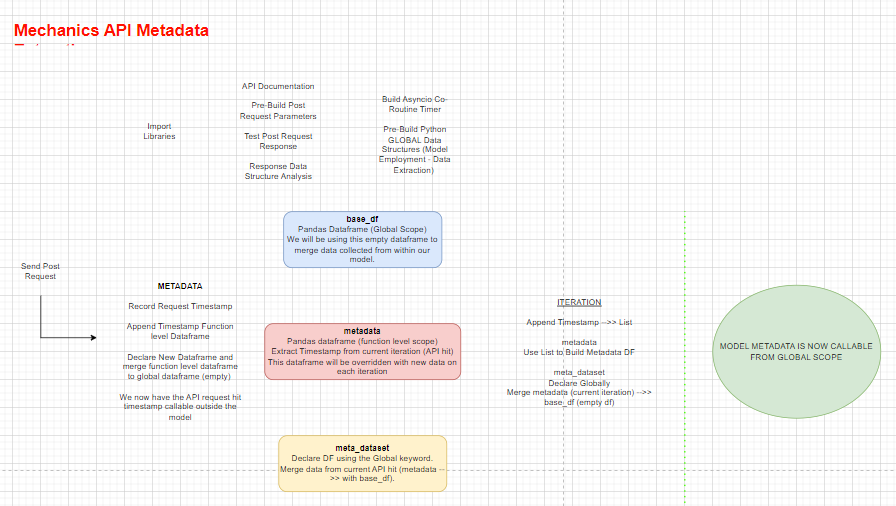

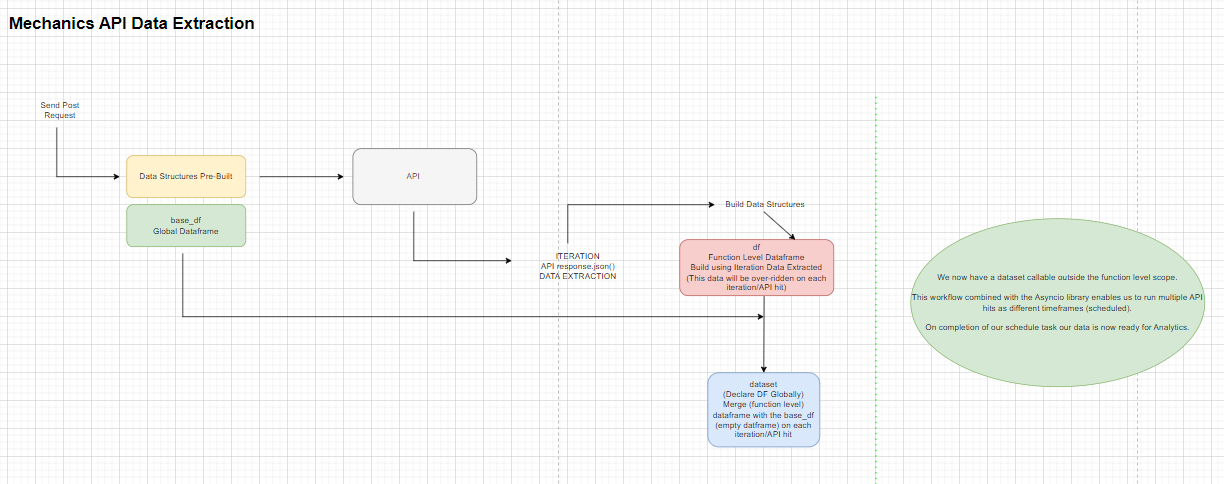

API PARAMETERS

In [3]:
url = "https://api.livecoinwatch.com/coins/list"

payload = json.dumps({
  "currency": "USD",
  "sort": "rank",
  "order": "ascending",
  "offset": 0,
  "limit": 100,
  "meta": False
})
headers = {
  'content-type': 'application/json',
  'x-api-key': '98b16066-5b97-48bd-aa0c-66fae75a6db7'
}

DATA STRUCTURES

In [4]:
cd, r, v, cp, time_stamp = ([] for i in range(5)) # intiate -> empty lists

# Create EMPTYY DataFrame from our models data collected -->> base (globaly declared) dataframes merging API data on each model scrape
base_df = pd.DataFrame ({'Coin':cd,'Rate':r,'Volume':v,'Cap':cp})
base_metadata_df = pd.DataFrame ({'API-Request-Timestamp':time_stamp})

### MODEL

In [5]:
# This coroutine will run a coroutine at a specific time
async def run_at_time(time, co_routine):
    # datetime -> now()
    print("coroutine_timer")
    # Get the current timestamp
    now = datetime.datetime.now() # datetime -->> retrive date time NOW
    print("run_at_time_now")
    print(now)

    # Calculate the delay until the next occurrence of time
    delay = ((time - now) % datetime.timedelta(days=1)).total_seconds()
    print("run_at_time_delay")
    print(delay)

    # Sleep until then
    await asyncio.sleep(delay) # await -> keyword and expression used within a coroutine to yield execution to an awaitable. 

    # Run the coroutine
    return await co_routine


# This is the coroutine that will be run <--time-->
async def api_scraper():
    # API post -->> request
    response = requests.request("POST", url, headers=headers, data=payload)
    
    # timestamp
    dt_request = datetime.datetime.now() # Getting the current date and time request executed/processes (time will be close to time server was hit for request)
    time_stamp.append(dt_request) # add/append to (pre-defined list)
    print(dt_request)
        
    # METADATA
    global meta_dataset # global keyword -->> declare dataframe globally to access in main scope (ie. outside function loop)
    metadata = pd.DataFrame({'API-Request-Timestamp':time_stamp})
    meta_dataset = pd.merge(base_metadata_df, metadata, how="outer")
        
    # RESPONE -->> JSON
    data = response.json()
    
    # API Data Extraction
    for item in data:
        #
        cd.append(item['code'])
        r.append(item['rate'])
        v.append(item['volume'])
        cp.append(item['cap'])
        
        #
        df = pd.DataFrame({'Coin':cd,'Rate':r,'Volume':v,'Cap':cp})
    #
    print(df.tail(4)) # display tail/bottom of dataset
        
    # 
    global dataset
    dataset = pd.merge(base_df, df, how="outer")
    
    print(datetime.datetime.now())
    print("%-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+$")
    
    
async def main():
    # delcare datetime object for <-->
    time1 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,0))
    time2 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,10))
    time3 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,20))
    time4 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,30))
    time5 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,40))
    time6 = datetime.datetime.combine(datetime.date.today(), datetime.time(17,50))
    time7 = datetime.datetime.combine(datetime.date.today(), datetime.time(18,0))
    print("main()-->>task-->>creater")
    print(time1)
    print(time2)
    print(time3)
    print(time4)
    print(time5)
    print(time6)
    print(time7)
    print("%-+-+-+-+-+-+-+-+-+-+-+$")

    # Run api_scraper at <--> every day
    while True:
        await run_at_time(time1, api_scraper())
        await run_at_time(time2, api_scraper())
        await run_at_time(time3, api_scraper())
        await run_at_time(time4, api_scraper())
        await run_at_time(time5, api_scraper())
        await run_at_time(time6, api_scraper())
        await run_at_time(time7, api_scraper())
        print("main()-close")

Create Task - Event Loop

An event loop is an object that manages the execution of coroutines, as well as other asynchronous tasks such as network IO operations, subprocesses, timers, etc. The event loop runs one coroutine at a time and switches to another one when the current one is blocked by an await expression or a blocking operation.

In [6]:
# define -> get running loop
event_loop = asyncio.get_running_loop() # get_running_loop() function used to get the running event loop

#
if event_loop.is_running(): # is_running() function returns True if the event loop is running.
    task = asyncio.create_task(main()) # create task -> scheduele co-routine (pass defined coroutine)

main()-->>task-->>creater
2024-06-11 17:00:00
2024-06-11 17:10:00
2024-06-11 17:20:00
2024-06-11 17:30:00
2024-06-11 17:40:00
2024-06-11 17:50:00
2024-06-11 18:00:00
%-+-+-+-+-+-+-+-+-+-+-+$
coroutine_timer
run_at_time_now
2024-06-11 16:56:45.079800
run_at_time_delay
194.9202
2024-06-11 17:00:00.497730
    Coin      Rate    Volume        Cap
96   XEC  0.000039   7235728  772020089
97    OM  0.928838  70368564  766870368
98  MINA  0.684048  29539390  765026940
99   KCS  9.990465    991989  755696203
2024-06-11 17:00:00.563555
%-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+$
coroutine_timer
run_at_time_now
2024-06-11 17:00:00.563555
run_at_time_delay
599.436445
2024-06-11 17:10:00.914070
     Coin       Rate    Volume        Cap
196  NEXO   1.387205   9114042  776834542
197  MINA   0.693710  29710369  775832829
198    OM   0.928538  70075800  766622980
199   KCS  10.056492   1009669  760690577
2024-06-11 17:10:00.988870
%-+-+-+-+-+-+-+-+-+-+-+-+-